# Finding $H_2$ Ground State Energy Analytically

<h2> Distribution Statement </h2>

DISTRIBUTION STATEMENT A. Approved for public release. Distribution is unlimited.

<br>
This material is based upon work supported by the Under Secretary of Defense for
Research and Engineering under Air Force Contract No. FA8702-15-D-0001. Any opinions,
findings, conclusions or recommendations expressed in this material are those of the
author(s) and do not necessarily reflect the views of the Under Secretary of Defense
for Research and Engineering.

<br>
© 2022 Massachusetts Institute of Technology.

<br>
<br>
The software/firmware is provided to you on an As-Is basis

<br>
<br>
Delivered to the U.S. Government with Unlimited Rights, as defined in DFARS Part
252.227-7013 or 7014 (Feb 2014). Notwithstanding any copyright notice, U.S. Government
rights in this work are defined by DFARS 252.227-7013 or DFARS 252.227-7014 as detailed
above. Use of this work other than as specifically authorized by the U.S. Government
may violate any copyrights that exist in this work.

For small enough molecules, the ground state properties can be calculated directly from diagonalization of the Hamiltonian. This is done below for $H_2$

In [1]:
import cirq
import numpy             as np
import matplotlib.pyplot as plt

#from openfermionpyscf   import run_pyscf
from openfermion.linalg import  get_sparse_operator
from openfermion.chem   import MolecularData

## Setup the Hamiltonian
We will use $H_2$ as a test case due to the molecule's simplicity.

In [2]:
### 
### Define the molecule and generate the Hamiltonian
### using openfermion and openfermionpyscf tools
###
diatomic_bond_length = 0.7414

###
### Note: You can define the geometry explictly, as below
### or you can use the 'geometry_from_pubchem' function from
### openfermion
###
geometry             = [
    ('H', (0., 0., 0.)), 
    ('H', (0., 0., diatomic_bond_length))]
basis = 'sto-3g'
multiplicity = 1
charge = 0
description = str(diatomic_bond_length)

molecule = MolecularData(geometry, basis, multiplicity, charge, description)

###
### First time running this notebook, use this command to calculate the
### 1e and 2e values. The values are then saved in a hidden hdf5 file.
###
#molecule = run_pyscf(molecule,
#    run_scf=1,
#    run_mp2=0,
#    run_cisd=0,
#    run_ccsd=0,
#    run_fci=0,
#    verbose=0)
### Second time  use this command to load the hdf5 file:
molecule.load()

###
### Get the molecular hamiltonian, which is an openfermion object
###
mol_ham = molecule.get_molecular_hamiltonian()

## Direct Diagonalization
Convert the molecular hamiltonian to a matrix, and diagonalize it directly to determine ground state energy.

In [3]:
###
### Convert the molecular hamiltonian to a dense matrix:
###
dense_ham = get_sparse_operator(mol_ham).todense()

###
### Get the eigenvalues and eigenvectors by diagonalization:
###
e_values, e_vectors = np.linalg.eig(dense_ham)

###
### Sort the eigenvalues. Print the GSE, and the accompanying 
### eigenstate
###
sorted_e_values       = np.sort_complex(e_values)
ground_state_e_value  = sorted_e_values[0]
gs_evalue_idx         = np.where(e_values==ground_state_e_value)
ground_state_e_vector = e_vectors[:, gs_evalue_idx[0][0]]

print(f'> The ground state energy is: {ground_state_e_value.real:0.4f}') # Note, this should be 100% real, but is formatted complex.
print(f'> The ground state is {cirq.dirac_notation(np.transpose(ground_state_e_vector).tolist()[0],4)}')

> The ground state energy is: -1.1373
> The ground state is -0.1128|0011⟩ + 0.9936|1100⟩


/Users/ke26222/opt/anaconda3/envs/pyLIQTR/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


(-1.5, 2.0)

/Users/ke26222/opt/anaconda3/envs/pyLIQTR/lib/python3.10/site-packages/matplotlib/text.py:831: ComplexWarning: Casting complex values to real discards the imaginary part
  y = float(self.convert_yunits(self._y))
/Users/ke26222/opt/anaconda3/envs/pyLIQTR/lib/python3.10/site-packages/matplotlib/text.py:691: ComplexWarning: Casting complex values to real discards the imaginary part
  posy = float(self.convert_yunits(self._y))


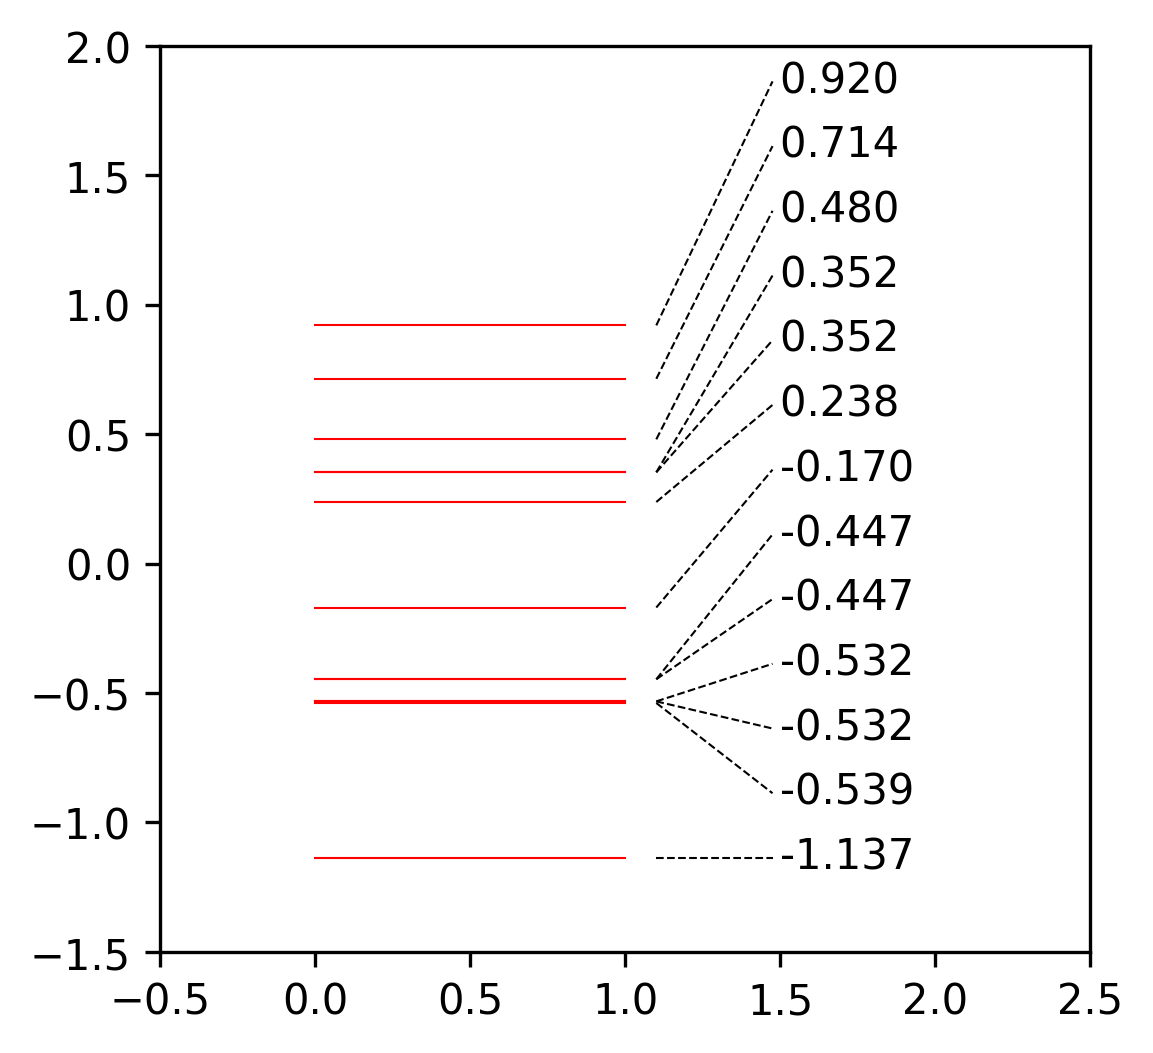

In [4]:
###
### Plot the energy spectrum:
###
plt.figure(figsize=(4, 4), dpi=300)

# Do some work on the energies:
ens_ = np.unique(sorted_e_values)
label_y = []
prev_en = None


for en_ in ens_:
    
    plt.plot([0,1],[en_, en_],  'r-', linewidth=0.5)
    
    if label_y:
        if en_ - prev_en > 0.25:
            label_y.append(label_y[-1] + 0.25)
        else:
            label_y.append(en_)
    else:
        label_y.append(en_)
        prev_en = en_
    

    plt.plot([1.1, 1.475], [en_, label_y[-1]], 'k--', linewidth=0.5)
    plt.text(1.5, label_y[-1]-0.0425, f'{en_.real:0.3f} ')
        

plt.xlim([-0.5, 2.5])
plt.ylim([-1.5, 2])